# PCA by Examples (Cont.d)

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
![ ! -f "./iris/iris.data" ] && mkdir ./iris/ && wget "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" -O ./iris/iris.data

In [3]:
iris = pd.read_csv('./iris/iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Scatter Plot Matrix with Different Markers

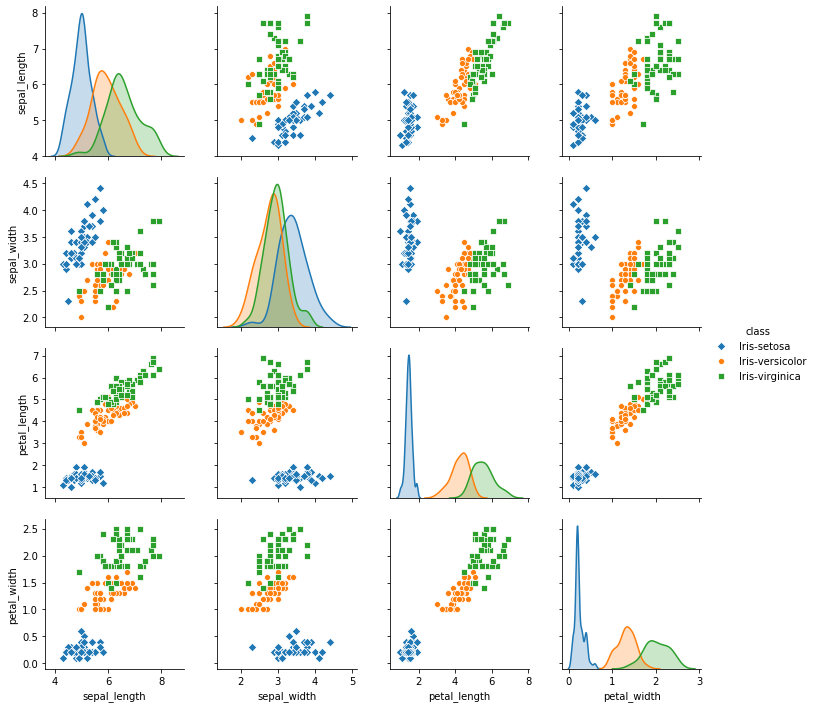

In [5]:
sns.pairplot(iris, hue="class", markers=['D', 'o', 's'])

## Covariance Matrix and its Eigenvalues

In [6]:
# Separating out the features
X = iris.filter(['sepal_length', 'sepal_width',	'petal_length',	'petal_width'])
# Standardizing the features
X = StandardScaler().fit_transform(X)
# Covariance matrix
cov_mat = np.cov(X.T)
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

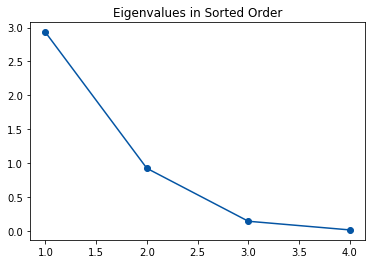

In [7]:
# Obtain eigenvalues and eigenvectors
eigenvals, eigenvecs = np.linalg.eig(cov_mat)
# Sort eigenvalues and eigenvectors in order of decreasing eigenvalue
idx = np.argsort(eigenvals)[::-1]
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:, idx]
# Plot eigenvalues in decreasing order
plt.plot(np.arange(1,5), eigenvals, color='#0455A4', marker='o', linestyle='-')
plt.title('Eigenvalues in Sorted Order')
eigenvals

## Projection onto the First Two Principal Components

In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
df_pca = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [9]:
iris_joined = pd.concat([df_pca, iris['class']], axis=1)
iris_joined.head()

,PC1,PC2,class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


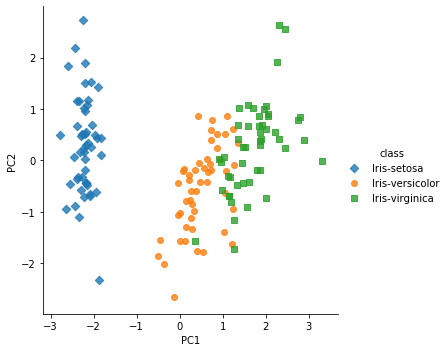

In [10]:
sns.lmplot('PC1', 'PC2', data=iris_joined, fit_reg=False, hue="class", markers=['D','o','s'])